# Partie 3 : Réglages pour le levier "Décarbonation du carburant"
<a id="10"></a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---
---
# 1. Préliminaires

## 1.1 Energie de l'aviation en 2019

1. Allez chercher sur le [diagramme de Sankey de l'AIE](https://www.iea.org/sankey/#?c=World&s=Final%20consumption) la quantité d'énergie utilisée par le secteur aérien en 2019. Vous exprimerez votre résultat en EJ.

> **Réponse**

In [ ]:
E_primaire_aviation_2019 = 14 # EJ

2. Calculez les émissions correspondantes, en incluant les émissions amont. Vous exprimerez votre résultat en MtCO2.

> **Réponse**

In [2]:
CO2_aviation_2019 = 1000 # MtCO2

---

## 1.2 Mix électrique et facteur d'émission

Le fichier prod-elec.csv est une version nettoyée des [données de Our World In Data](https://ourworldindata.org/grapher/electricity-prod-source-stacked) qui donnent la quantité d'électricité en TWh produite par pays, par an et par "matière première". Ainsi, le fichier prod-elec.csv donne la production au niveau monde.

1. Expliquez succinctement ce que fait chaque ligne de code ci-dessous.

> **Réponse**

In [3]:
prod_elec = pd.read_csv("BE-decarbo/prod-elec.csv")
source_elec = ['charbon','gaz','hydro','autre','pv','petrole','eolien','nucleaire']
prod_elec[source_elec] = prod_elec[source_elec] * 3.6/1000
prod_elec['total'] = prod_elec[source_elec].sum(axis=1)
source_elec_bc = ['hydro','autre','pv','eolien','nucleaire']
prod_elec['total bc'] = prod_elec[source_elec_bc].sum(axis=1)
for s in source_elec:
    name = 'prop '+s
    prod_elec[name] = prod_elec[s]/prod_elec['total']
prod_elec.head()

,annee,charbon,gaz,hydro,autre,pv,petrole,eolien,nucleaire,total,total bc,prop charbon,prop gaz,prop hydro,prop autre,prop pv,prop petrole,prop eolien,prop nucleaire
0,1985,13.491482,5.120500,7.127190,0.280051,0.000043,3.991540,0.000230,5.360119,35.371156,12.767634,0.381426,0.144765,0.201497,0.007918,1.221334e-06,0.112847,0.000007,0.151539
1,1986,13.817772,5.143529,7.223659,0.308084,0.000054,4.198496,0.000500,5.741050,36.433145,13.273348,0.379264,0.141177,0.198272,0.008456,1.482167e-06,0.115238,0.000014,0.157578
2,1987,14.606219,5.446566,7.321342,0.329915,0.000040,4.251679,0.000702,6.245039,38.201501,13.897037,0.382347,0.142575,0.191651,0.008636,1.036608e-06,0.111296,0.000018,0.163476
3,1988,15.117113,5.531576,7.555396,0.339412,0.000036,4.515437,0.001195,6.808496,39.868661,14.704535,0.379173,0.138745,0.189507,0.008513,9.029649e-07,0.113258,0.000030,0.170773
4,1989,15.757625,6.207790,7.515256,0.375653,0.000943,4.848199,0.009540,7.002040,41.717045,14.903431,0.377726,0.148807,0.180148,0.009005,2.260946e-05,0.116216,0.000229,0.167846


2. Tracez l'évolution de la production électrique par source, et un deuxième graphe en se concentrant sur l'électricité bas carbone. Commentez les résultats.

> **Réponse**

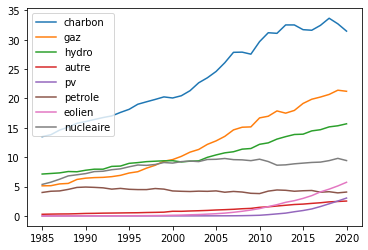

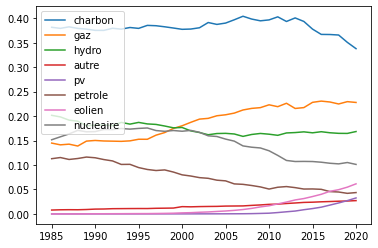

In [4]:
for s in source_elec:
    plt.plot(prod_elec['annee'], prod_elec[s],label=s)
plt.legend()
plt.show()

for s in source_elec:
    plt.plot(prod_elec['annee'], prod_elec['prop '+s],label=s)
plt.legend()
plt.show()

3. Récupérez dans le [5ème rapport d'évaluation du GIEC](https://www.ipcc.ch/site/assets/uploads/2018/02/ipcc_wg3_ar5_annex-iii.pdf) les données concernant les facteurs d'émission des différentes sources d'électricité (pour le pétrole vous prendrez 700 gCO2-eq/kWh).

In [5]:
facteurs_emission = pd.DataFrame(data=[1000, 400, 20, 50, 40, 700, 12, 10])
facteurs_emission.index = source_elec
facteurs_emission = facteurs_emission.T
facteurs_emission.head()

,charbon,gaz,hydro,autre,pv,petrole,eolien,nucleaire
0,1000,400,20,50,40,700,12,10


4. En supposant que les facteurs d'émission sont restés constants, tracez l'évolution des émissions de CO2 et du facteur d'émission au cours du temps et commentez les courbes obtenues.

> **Réponse**

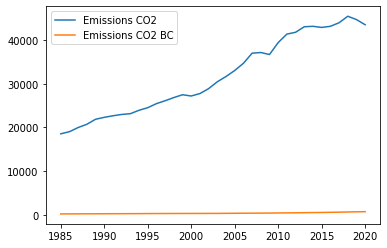

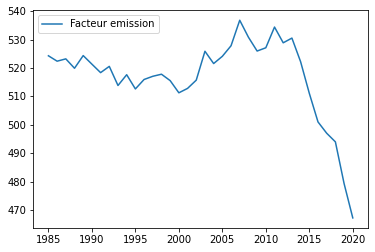

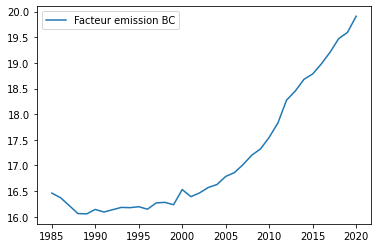

In [6]:
prod_elec['CO2'] = prod_elec[source_elec].dot(facteurs_emission.T)
prod_elec['fe'] = prod_elec['CO2']/prod_elec['total']
prod_elec['CO2 bc'] = prod_elec[source_elec_bc].dot(facteurs_emission[source_elec_bc].T)
prod_elec['fe bc'] = prod_elec['CO2 bc']/prod_elec['total bc']

plt.plot(prod_elec['annee'], prod_elec['CO2'], label="Emissions CO2")
plt.plot(prod_elec['annee'], prod_elec['CO2 bc'], label="Emissions CO2 BC")
plt.legend()
plt.show()

plt.plot(prod_elec['annee'], prod_elec['fe'], label="Facteur emission")
plt.legend()
plt.show()

plt.plot(prod_elec['annee'], prod_elec['fe bc'], label="Facteur emission BC")
plt.legend()
plt.show()

Entre 2020 et 2050 on utilisera les données de l'IRENA.

5. En vous inspirant des codes ci-dessus, rajoutez une colonne 'facteur emission 2018' et 'facteur emission 2050'

In [ ]:
IRENA = pd.read_csv("BE-decarbo/IRENA.csv")
IRENA['facteur emission 2018'] = 
IRENA['facteur emission 2050'] = 
IRENA.head()

La courbe suivante trace l'évolution du facteur d'émission avec une simple interpolation linéaire : nous nous en servirons dans la suite du BE.

In [ ]:
PES = IRENA.loc[(IRENA['Scenario']=='Planned Energy Scenario')].iloc[:,-2:].T
TES = IRENA.loc[(IRENA['Scenario']=='Transforming Energy Scenario')].iloc[:,-2:].T
scenario_15 = IRENA.loc[(IRENA['Scenario']=='1.5OC Scenario')].iloc[:,-2:].T
x=[2018,2050]
plt.plot(x,PES,label='PES')
plt.plot(x,TES,label='TES')
plt.plot(x,scenario_15,label='1.5')
plt.legend()
plt.show()

---
---
# 2. Etude des nouveaux vecteurs énergétiques par rapport au contexte actuel

---
## 2.1 Avion à hydrogène

Comme pour l'avion tout électrique, on imagine que tous les avions sont instantanément remplacés par des avions à hydrogène et on cherche à comprendre l'impact sur l'énergie et les émissions.

### 2.1.1 Préliminaires : efficacité et liquéfaction



1. Choisissez et justifiez succinctement **une seule** valeur d'évolution du besoin en énergie embarquée, que vous utiliserez par la suite (un choix subjectif est parfaitement acceptable).

> **Réponse**

2. Calculez la quantité d'hydrogène nécessaire pour alimenter l'intégralité de la flotte. Comparez par rapport à la production d'hydrogène en 2020 et commentez ce résultat.

3. Avec les hypothèses que vous avez choisies, calculez la quantité d'électricité nécessaire pour liquéfier l'hydrogène.

### 2.1.2 Méthodes de production actuelles


1. Comparez le facteur d'émission actuel (10 kgCO2/10 kgH2) aux émissions dues à la production d'hydrogène par vaporéformage du gaz naturel et par gaséification du charbon, et commentez le résultat obtenu.

2. En supposant que tous les avions actuels sont remplacés par des avions à hydrogène produit avec les méthodes actuelles de production et en utilisant le mix électrique actuel, calculez la quantité d'électricité nécessaire, ainsi que les émissions de CO2 correspondantes. Commentez les résultats obtenus.

> **Réponse**

### 2.1.3 Production par électrolyse

On suppose maintenant que l'hydrogène est produit par électrolyse de l'eau.

1. Calculez la quantité d'électricité nécessaire. Comparez-la à la quantité d'électricité produite actuellement, et à la quantité d'électricité produite de manière bas carbone et commentez les résultats obtenus.

> **Réponse**

2. Calculez l'évolution des émissions de CO2 selon que l'on utilise le mix actuel ou un mix bas-carbone, et commentez les résultats obtenus.

> **Réponse**

3. Quel facteur d'émission faudrait-il atteindre, et quand cela aurait-il lieu dans les scénarios de l'IRENA ? Commentez les résultats obtenus.

---
## 2.2 Electrocarburants

On suppose maintenant que l'ensemble de la flotte est alimentée par des électrocarburants. A partir de quelle valeur du facteur d'émission de l'électricité devient-il intéressant de remplacer le kérosène fossile par des électrocarburants ? Commentez les résultats obtenus.

> **Réponse**

---
## 2.3 Biocarburants

Dans un premier temps, on suppose que la sélectivité vaut 100%, ie, que les voies de production considérées produisent 100% de biokérosène.

1. Quelle serait la demande en biomasse si toute la flotte de 2019 utilisait des biocarburants ? Vous considérerez trois cas distincts selon que les biocarburants sont produits par la voie HEFA, FT ou AtJ.

> **Réponse**

2. Comparez ces chiffres à la bioénergie disponible en 2020 et commentez les résultats obtenus. Vous pourrez affiner votre réponse en utilisant la répartition suivante : 10% cultures lipidiques, 30% cultures glucidiques et 40% cultures lignocellulosiques.

> **Réponse**

3. Calculez les émissions correspondantes en considérant les plages de valeurs suivantes pour les facteurs d'émission exprimées en gCO2/MJ (1er quartile - médiane - 3ème quartile) :
    * FT : 0,3 - 7,7 - 12,6
    * HEFA à partir d'huiles : 20,7
    * HEFA à partir de culture : 42,1 - 61 - 73,9
    * AtJ : 33,7 - 52,2 - 68,4

> **Réponse**

On souhaite maintenant prendre en compte la sélectivité.

4. Quelle est qualitativement l'influence de la sélectivité sur les calculs précédents ?

> **Réponse**

5. Reprenez les questions précédentes en prenant en compte la sélectivité, uniquement pour la voie FT et en considérant la valeur médiane du facteur d'émission.

> **Réponse**

## 3.4 (PARTIE OPTIONNELLE) Avion tout électrique

Imaginons que tous les avions deviennent des avions tout électrique. Pour les calculs suivants, vous utiliserez:
- pour la production d'électricité : les valeurs calculées dans la partie 1
- pour l'avion électrique : les chiffres présentés dans le cours issus de l'article de Gnadt et al.

 

1. Combien d'électricité faudrait-il **produire** ? Vous prendrez soin d'expliquer votre calcul, les termes que vous avez pris en compte ou non ainsi que les valeurs que vous avez choisies. Comparez cette valeur à la quantité d'électricité totale et à la quantité d'électricité bas carbone et commentez les résultats obtenus.

> **Réponse**

2. Avec le mix électrique mondial actuel, quelle serait l'évolution des émissions de CO2 ? et avec un mix électrique bas carbone ? Commentez les résultats obtenus.

> **Réponse**

3. En utilisant l'extrapolation linéaire issue des prévisions de l'IRENA, calculer la valeur du mix électrique mondial pour que cette solution devienne intéressante, et la date (année) correspondante. Comparez par rapport aux résultats de Gnadt et al et commentez.

> **Réponse**

---
---
# 3 Scénarios à horizon 2050

Dans toute cette partie on suppose que le trafic croît de 3% par an sans prise en compte de la crise COVID, donc une évolution du trafic à partir de 2019. On considère quatre scénarios en 2050:
1. Scénario tendanciel : en 2050, la flotte est constituée à 100% d'avions conventionnels. D'ici là, l'amélioration de la consommation (efficacité et opération) s'élève à 1,5% par an
2. Scénario biocarburant : idem que scénario tendanciel, mais en 2050 toute la flotte utilise des biocarburants
3. Scénario électrocarburant : idem que scénario tendanciel, mais en 2050 toute la flotte utilise des électrocarburants
4. Scénario hydrogène : en 2050 toute la flotte utilise de l'hydrogène


1. Pour le scénario biocarburant, faites un choix de voie de production et de facteur d'émission, que vous justifierez succinctement. Dans le reste du BE, vous garderez ce choix.

> **Réponse**

2. Calculez pour chacun des scénarios la quantité d'énergie embarquée nécessaire.

> **Réponse**

3. Calculez pour chacun des scénarios les émissions de CO2 associées en 2050.

> **Réponse**

4. Calculez pour chacun des scénarios la quantité d'énergie primaire (électricité ou bioénergie) nécessaire.

> **Réponse**

5. A partir des données suivantes (issues de l'IRENA), faites un choix de disponibilité en bioénergie en 2050. Comparez la quantité de bioénergie calculée à la question précédente à cette valeur, et commentez le résultat.

> **Réponse**

In [ ]:
dispo_bio = pd.read_csv("BE-decarbo/dispo-bio-2050.csv")
dispo_bio.boxplot()
print(dispo_bio.median())

6. A partir des données suivantes (issues de scénarios prospectifs du GIEC, de l'IRENA, de l'AIE et de Shell), faites un choix de disponibilité en électricité en 2050. Comparez la quantité d'électricité calculée à la question précédente à cette valeur, et commentez le résultat.

> **Réponse**

In [ ]:
dispo_elec = pd.read_csv("BE-decarbo/dispo-elec-2050.csv")
dispo_elec.boxplot(column=['prod elec 2050'])
print(dispo_elec['prod elec 2050'].median())

7. Au vu des calculs précédents, proposez un scénario pour l'aviation à 2050 en terme de proportion d'hydrogène, de biocarburant, d'électrocarburant et de kérosène fossile. Vous justifierez sommairement votre choix, pour lequel vous calculerez le besoin en énergie "primaire" (pétrole, électricité et bioénergie) et ce qu'il représente en terme de disponibilité. Calculez aussi les émissions de CO2 associées et commentez les résultats obtenus.

> **Réponse**